In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import re
import string
import nltk
from nltk.util import ngrams

pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')

# Lemmatizer
wn = nltk.WordNetLemmatizer()

In [15]:
from ipywidgets import interact, interactive, interact_manual

In [2]:
data = pd.read_csv('../Data/DataSet.csv')
data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbreaking and award-winning cooking site. We support,...","<p>Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and...",<ul>\r\n<li>Experience with content management systems a major plus (any blogging counts!)</li>\...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Production Service.</h3>\r\n<p>90 Seconds is the worlds C...",<p>Organised - Focused - Vibrant - Awesome!<br><br>Do you have a passion for customer service? S...,<p><b>What we expect from you:</b></p>\r\n<p>Your key responsibility will be to communicate with...,<h3><b>What you will get from us</b></h3>\r\n<p>Through being part of the 90 Seconds team you wi...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workforce Solutions that meet the needs of companies acr...,"<p>Our client, located in Houston, is actively seeking an experienced Commissioning Machinery As...",<ul>\r\n<li>Implement pre-commissioning and commissioning procedures for rotary equipment.</li>\...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life through geography is at the heart of everything we ...,<p><b>THE COMPANY: ESRI – Environmental Systems Research Institute</b></p>\r\n<p>Our passion for...,"<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s or Master’s in GIS, business administration, or a r...","<p>Our culture is anything but corporate—we have a collaborative, creative environment; phone di...",f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human Capital Management Consulting firm headquartered i...,"<p><b>JOB TITLE:</b> Itemization Review Manager</p>\r\n<p><b>LOCATION:</b> Fort Worth, TX<b> ...",<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>RN license in the State of Texas</li>\r\n<li>Diplom...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


In [3]:
data.shape

(17880, 18)

In [4]:
print("Unique locations", len(data.location.unique()))
print("Unique job titles", len(data.title.unique()))
print("Unique industries", len(data.industry.unique()))

Unique locations 3106
Unique job titles 11231
Unique industries 132


Text(0, 0.5, 'Count')

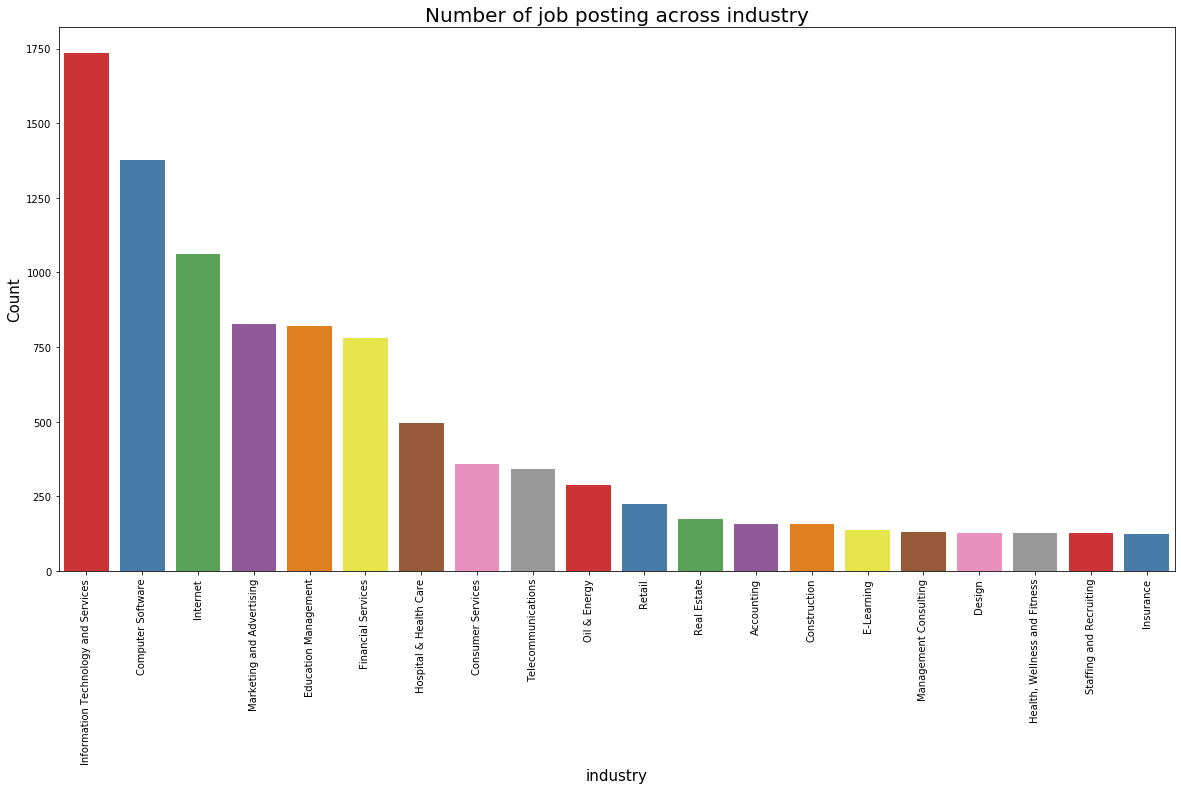

In [28]:
# check number of job posting across industry
count_jobs = data.groupby(["industry"], as_index=False).agg({'title':'count'}).sort_values('title', ascending = False).head(20)

# plot
plt.rcParams["figure.figsize"] = (20,10)

# plt.bar(count_jobs.industry, count_jobs.title, color="Set1")
g = sns.barplot("industry", "title", data=count_jobs, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Number of job posting across industry", fontsize=20)
g.set_xlabel("industry", fontsize=15)
g.set_ylabel("Count", fontsize=15)

In [91]:
def clean_text(text):
    
    tokens = []
    try:
        # remove html tags
        # anything that starts with <, has a set of characters [a-z], starts with (^) < 
        # has one or more occurances (+) and having one of more repetition (?)
        text = re.sub('<[^<]+?>', '', text)
        
        text = "".join([word for word in text if word not in tags and  word not in string.punctuation])
#         text = "".join([word for word in text])
        tokens = re.split('\W+', text)
        tokens = [wn.lemmatize(word) for word in tokens if word not in stopwords and word not in ""]
    except:
            pass
    return tokens

In [92]:
data['company_profile_cleaned'] = data['company_profile'].apply(lambda x: clean_text(x))

In [95]:
data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset,company_profile_cleaned
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbreaking and award-winning cooking site. We support,...","<p>Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and...",<ul>\r\n<li>Experience with content management systems a major plus (any blogging counts!)</li>\...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f,"[Were, Food52, weve, created, groundbreaking, awardwinning, cooking, site, We, support, connect,..."
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Production Service.</h3>\r\n<p>90 Seconds is the worlds C...",<p>Organised - Focused - Vibrant - Awesome!<br><br>Do you have a passion for customer service? S...,<p><b>What we expect from you:</b></p>\r\n<p>Your key responsibility will be to communicate with...,<h3><b>What you will get from us</b></h3>\r\n<p>Through being part of the 90 Seconds team you wi...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f,"[90, Seconds, world, Cloud, Video, Production, Service90, Seconds, world, Cloud, Video, Producti..."
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workforce Solutions that meet the needs of companies acr...,"<p>Our client, located in Houston, is actively seeking an experienced Commissioning Machinery As...",<ul>\r\n<li>Implement pre-commissioning and commissioning procedures for rotary equipment.</li>\...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f,"[Valor, Services, provides, Workforce, Solutions, meet, need, company, across, Private, Sector, ..."
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life through geography is at the heart of everything we ...,<p><b>THE COMPANY: ESRI – Environmental Systems Research Institute</b></p>\r\n<p>Our passion for...,"<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s or Master’s in GIS, business administration, or a r...","<p>Our culture is anything but corporate—we have a collaborative, creative environment; phone di...",f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f,"[Our, passion, improving, quality, life, geography, heart, everything, Esri, geographic, informa..."
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human Capital Management Consulting firm headquartered i...,"<p><b>JOB TITLE:</b> Itemization Review Manager</p>\r\n<p><b>LOCATION:</b> Fort Worth, TX<b> ...",<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>RN license in the State of Texas</li>\r\n<li>Diplom...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f,"[SpotSource, Solutions, LLC, Global, Human, Capital, Management, Consulting, firm, headquartered..."


In [94]:
data[['company_profile', 'company_profile_cleaned']]

,company_profile,company_profile_cleaned
0,"<h3>We're Food52, and we've created a groundbreaking and award-winning cooking site. We support,...","[Were, Food52, weve, created, groundbreaking, awardwinning, cooking, site, We, support, connect,..."
1,"<h3>90 Seconds, the worlds Cloud Video Production Service.</h3>\r\n<p>90 Seconds is the worlds C...","[90, Seconds, world, Cloud, Video, Production, Service90, Seconds, world, Cloud, Video, Producti..."
2,<h3></h3>\r\n<p>Valor Services provides Workforce Solutions that meet the needs of companies acr...,"[Valor, Services, provides, Workforce, Solutions, meet, need, company, across, Private, Sector, ..."
3,<p>Our passion for improving quality of life through geography is at the heart of everything we ...,"[Our, passion, improving, quality, life, geography, heart, everything, Esri, geographic, informa..."
4,<p>SpotSource Solutions LLC is a Global Human Capital Management Consulting firm headquartered i...,"[SpotSource, Solutions, LLC, Global, Human, Capital, Management, Consulting, firm, headquartered..."
...,...,...
17875,<p>Vend is looking for some awesome new talent to come join us. You'll be working in an awesome ...,"[Vend, looking, awesome, new, talent, come, join, u, Youll, working, awesome, team, awesome, thi..."
17876,<p>WebLinc is the e-commerce platform and services provider for the fastest growing online retai...,"[WebLinc, ecommerce, platform, service, provider, fastest, growing, online, retailer, WebLinc, m..."
17877,<p>We Provide Full Time Permanent Positions for many medium to large US companies. We are intere...,"[We, Provide, Full, Time, Permanent, Positions, many, medium, large, US, company, We, interested..."
17878,NaN,[]


In [ ]:
# check if the location is legitimate by comparing with a list of USA states and locations - Tanaya

# Identifying what are the words jargons and fake words associated with each industry and location using columns company desc, requirements, etc
# Swetha and Tanvi

# frequency of words - Jyoti

# 

